# SMOTE 

In [1]:
# as our data is imbalanced, we need to balance it out, we will use upsamling method called as SMOTE 
# (Synthetic minority oversampling technique)

In [2]:
import pandas as pd # load the dataset

In [3]:
data=pd.read_csv('Simple insurance_fraud.csv',index_col=0)

In [4]:
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [6]:
data['Fraud'].value_counts() # to get the insights of the target class

0    323
1     35
Name: Fraud, dtype: int64

In [7]:
data.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

In [8]:
X=data[['AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose']]

In [9]:
Y=data['Fraud']

In [10]:
X=pd.get_dummies(X,drop_first=True) # convert catagorical features into numeric as computer dont understand strings

In [11]:
X.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Complaint,Purpose_Other
0,0,0,0,1,2,0,15000.0,60,0.5,0,1,1,0
1,1,1,0,0,0,0,20000.0,10,1.0,0,0,1,0
2,0,1,2,0,0,0,18000.0,10,1.4,0,0,0,0
3,0,0,0,1,1,0,12000.0,20,2.0,0,1,1,0
4,0,0,0,0,1,2,25000.0,6,1.3,0,0,0,0


In [12]:
# Normalize the feature
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()

In [15]:
x_sc= sc.fit_transform(X)


In [16]:
X_norm=pd.DataFrame(x_sc,columns=X.columns)

In [17]:
X_norm.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Complaint,Purpose_Other
0,-0.528826,-0.536541,-0.385596,1.002949,2.309777,-0.528239,0.249492,-0.546880,-0.990343,-0.553687,1.285244,1.205012,-0.359635
1,1.062096,1.091270,-0.385596,-0.607166,-0.675422,-0.528239,0.664555,-0.739656,-0.947028,-0.553687,-0.778062,1.205012,-0.359635
2,-0.528826,1.091270,3.396416,-0.607166,-0.675422,-0.528239,0.498530,-0.739656,-0.912376,-0.553687,-0.778062,-0.829867,-0.359635
3,-0.528826,-0.536541,-0.385596,1.002949,0.817178,-0.528239,0.000454,-0.701101,-0.860398,-0.553687,1.285244,1.205012,-0.359635
4,-0.528826,-0.536541,-0.385596,-0.607166,0.817178,3.411541,1.079618,-0.755078,-0.921039,-0.553687,-0.778062,-0.829867,-0.359635


## divide the datasets into training and testing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X_norm,Y, test_size= 0.3, random_state= 100)

In [21]:
y_train.value_counts()

0    224
1     26
Name: Fraud, dtype: int64

## upsampling by SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
sm=SMOTE(sampling_strategy=1,random_state=12)

In [35]:
x_train_os,y_train_os=sm.fit_sample(x_train,y_train)

In [36]:
y_train_os.value_counts()

1    224
0    224
Name: Fraud, dtype: int64

In [37]:
# Now we have balanced training set

In [38]:
# lets use Random forest classifier to build model

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier(n_estimators=100)

In [41]:
rfc.fit(x_train_os,y_train_os)

RandomForestClassifier()

In [42]:
y_predict_rfc_=rfc.predict(x_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
confusion_matrix(y_test,y_predict_rfc_)

array([[92,  7],
       [ 8,  1]])

In [45]:
print(classification_report(y_test,y_predict_rfc_))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        99
           1       0.12      0.11      0.12         9

    accuracy                           0.86       108
   macro avg       0.52      0.52      0.52       108
weighted avg       0.85      0.86      0.86       108



In [46]:
x_train.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Complaint,Purpose_Other
213,1.062096,1.091270,-0.385596,-0.607166,-0.675422,-0.528239,-0.663648,-0.639413,-0.600507,1.806074,-0.778062,1.205012,-0.359635
124,-0.528826,-0.536541,-0.385596,1.002949,0.817178,-0.528239,-0.517213,0.675319,0.698946,-0.553687,-0.778062,-0.829867,2.780595
54,-0.528826,-0.536541,-0.385596,1.002949,-0.675422,3.411541,0.249492,-0.720379,-0.921039,-0.553687,-0.778062,1.205012,-0.359635
142,-0.528826,-0.536541,-0.385596,1.002949,2.309777,1.441651,-0.645717,1.635343,1.565248,1.806074,-0.778062,1.205012,-0.359635
65,1.062096,1.091270,3.396416,-0.607166,-0.675422,-0.528239,-0.165572,-0.731945,-0.470562,-0.553687,-0.778062,-0.829867,-0.359635


In [47]:
y_train.shape

(250,)

## Hyperparameters optimization

In [48]:
RandomForestClassifier.get_params(RandomForestClassifier).keys()

/Users/abhyudaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [49]:
n_estimators=[50,100,150,200]
max_depth=[1,3,5,None]
criterion=["gini","entropy"]




In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
gsc=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':n_estimators,'max_depth':max_depth,
                                                               'criterion':criterion},cv=5,verbose=2)

In [52]:
gsc.fit(x_train_os,y_train_os)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=1, n_estimators=50 ....................
[CV] ..... criterion=gini, max_depth=1, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=50 ....................
[CV] ..... criterion=gini, max_depth=1, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=50 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=1, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=50 ....................
[CV] ..... criterion=gini, max_depth=1, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=50 ....................
[CV] ..... criterion=gini, max_depth=1, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.1s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .... criterion=gini, max_depth=1, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=1, n_estimators=100 ...................
[CV] .

[CV] .. criterion=gini, max_depth=None, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=50 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=50 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=50 .................
[CV] .. criterion=gini, max_depth=None, n_estimators=50, total=   0.1s
[CV] criterion=gini, max_depth=None, n_estimators=100 ................
[CV] . criterion=gini, max_depth=None, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=None, n_estimators=100 ................
[CV] . criterion=gini, max_depth=None, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_depth=None, n_estimators=100 ................
[CV] . criterion=gini, max_depth=None, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_depth=None, n_estimators=100 ................
[CV] .

[CV] . criterion=entropy, max_depth=3, n_estimators=200, total=   0.3s
[CV] criterion=entropy, max_depth=5, n_estimators=50 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=50, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=50 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=50, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=50 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=50, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=50 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=50, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=50 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=50, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................
[CV] . criterion=entropy, max_depth=5, n_estimators=100, total=   0.2s
[CV] criterion=entropy, max_depth=5, n_estimators=100 ................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   40.2s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [53]:
gsc.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 150}

In [54]:
gsc.best_score_

0.91083645443196

In [55]:
# train the model with the best params

In [56]:
rfc=RandomForestClassifier(criterion= 'entropy', max_depth= None, n_estimators= 150)

In [57]:
rfc.fit(x_train_os,y_train_os)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [59]:
y_pred_cv=rfc.predict(x_test)

In [60]:
confusion_matrix(y_test,y_pred_cv)

array([[90,  9],
       [ 7,  2]])

In [61]:
print(classification_report(y_test,y_pred_cv))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        99
           1       0.18      0.22      0.20         9

    accuracy                           0.85       108
   macro avg       0.55      0.57      0.56       108
weighted avg       0.87      0.85      0.86       108



In [62]:
# let's find out the average accuracy by using cv

In [63]:
from sklearn.model_selection import cross_val_score


In [64]:
cvs=cross_val_score(RandomForestClassifier(),X=x_train_os,y=y_train_os,cv=10,verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished


In [65]:
cvs  # shows the accuracy obtained for each iteration.

array([0.68888889, 0.86666667, 0.97777778, 0.97777778, 0.91111111,
       0.95555556, 0.95555556, 0.88888889, 0.97727273, 0.88636364])

## Naive-Bayes classifier

In [67]:
from sklearn.naive_bayes import GaussianNB



In [68]:
nb=GaussianNB()

In [69]:
nb.fit(x_train_os,y_train_os)

GaussianNB()

In [70]:
y_pred_nb=nb.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.63      0.75        99
           1       0.12      0.56      0.20         9

    accuracy                           0.62       108
   macro avg       0.53      0.59      0.47       108
weighted avg       0.87      0.62      0.71       108



## ROC and AUC

In [72]:
from sklearn.metrics import roc_auc_score,roc_curve

In [73]:
roc_auc_score(y_test,y_pred_cv)

0.5656565656565656

In [74]:
roc_auc_score(y_test,y_pred_nb)

0.5909090909090909

In [75]:
roc_auc_score(y_test,y_predict_rfc_)

0.5202020202020202

In [76]:
r_fpr,r_tpr,_=roc_curve(y_test,y_pred_cv)
nr_fpr,nr_tpr,_=roc_curve(y_test,y_pred_nb)
fr_fpr,fr_tpr,_=roc_curve(y_test,y_predict_rfc_)


In [77]:
import matplotlib.pyplot as plt

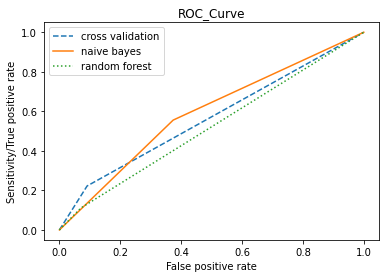

In [78]:
plt.plot(r_fpr,r_tpr,ls="--",label="cross validation")
plt.plot(nr_fpr,nr_tpr,ls="-",label="naive bayes")
plt.plot(fr_fpr,fr_tpr,ls=":",label="random forest")

plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/True positive rate')
plt.title('ROC_Curve')
plt.legend()
